# Scientific Numbers Inspired by The Big Bang Theory: Bazzzzzinga
In this project, we analyze a set of scientific numbers inspired by the TV show *The Big Bang Theory*. The aim is to explore the distribution of these numbers and identify which statistical distributions they most resemble. As a Big Bang Theory fan, I chose this project inspired by the idea of analyzing the distributions of scientific constants. When I think about the scientific curiosity of the show's characters and their interest in mathematical analysis, I was very excited about such a project. Studying various statistical distributions over scientific numbers actually feels like a small part of our effort to understand the universe. This project became very meaningful in terms of both learning statistical modeling and reflecting the world of the show that is intertwined with science.

We'll use several well-known statistical tests to determine how well different distributions (like normal, log-normal, exponential, and gamma) fit this data.

This project is not just about code but also aims to explore how various statistical models behave when applied to real-world scientific constants, which are key to understanding the universe.


In [1]:
# Gerekli kütüphaneleri içe aktarıyoruz
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# The Big Bang Theory temalı bilimsel sayılar
big_bang_theory_numbers = [
    13.8,                # Evrenin yaşı (milyar yıl)
    2.725,               # Kozmik mikrodalga arka plan ısısı (Kelvin)
    6.626e-34,           # Planck sabiti (Joule*second)
    299792458,           # Işık hızı (m/s)
    9.81,                # Yerçekimi ivmesi (m/s^2)
    1.602e-19,           # Elektron yükü (Coulomb)
    1.380649e-23,        # Boltzmann sabiti (Joule/Kelvin)
    6.02214076e23,       # Avogadro sayısı (1/mol)
    3.1415926535,        # Pi sayısı
    2.99792458e8,        # Işık hızı (m/s)
    1.6726219e-27,       # Proton kütlesi (kg)
    9.10938356e-31,      # Elektron kütlesi (kg)
    8.314462618,         # Gaz sabiti (Joule/(mol*K))
    5.670374419e-8,      # Stefan-Boltzmann sabiti (W/(m^2*K^4))
    6.67430e-11,         # Evrensel çekim sabiti (m^3/(kg*s^2))
    1.25663706212e-6,    # Manyetik alan sabiti (N/A^2)
    8.9875517923e9,      # Coulomb sabiti (N*m^2/C^2)
    273.15,              # Suyun donma noktası (Kelvin)
    5.9722e24,           # Dünya'nın kütlesi (kg)
    1.989e30             # Güneş'in kütlesi (kg)
]

# Diziyi numpy array'e çeviriyoruz
data = np.array(big_bang_theory_numbers)

data


array([1.38000000e+01, 2.72500000e+00, 6.62600000e-34, 2.99792458e+08,
       9.81000000e+00, 1.60200000e-19, 1.38064900e-23, 6.02214076e+23,
       3.14159265e+00, 2.99792458e+08, 1.67262190e-27, 9.10938356e-31,
       8.31446262e+00, 5.67037442e-08, 6.67430000e-11, 1.25663706e-06,
       8.98755179e+09, 2.73150000e+02, 5.97220000e+24, 1.98900000e+30])

In [2]:
# Basic Statistics
print("Basic Statistics:")
print(f"Mean: {np.mean(data):.2e}")
print(f"Median: {np.median(data):.2e}")
print(f"Standard Deviation: {np.std(data):.2e}")


Basic Statistics:
Mean: 9.95e+28
Median: 5.73e+00
Standard Deviation: 4.33e+29


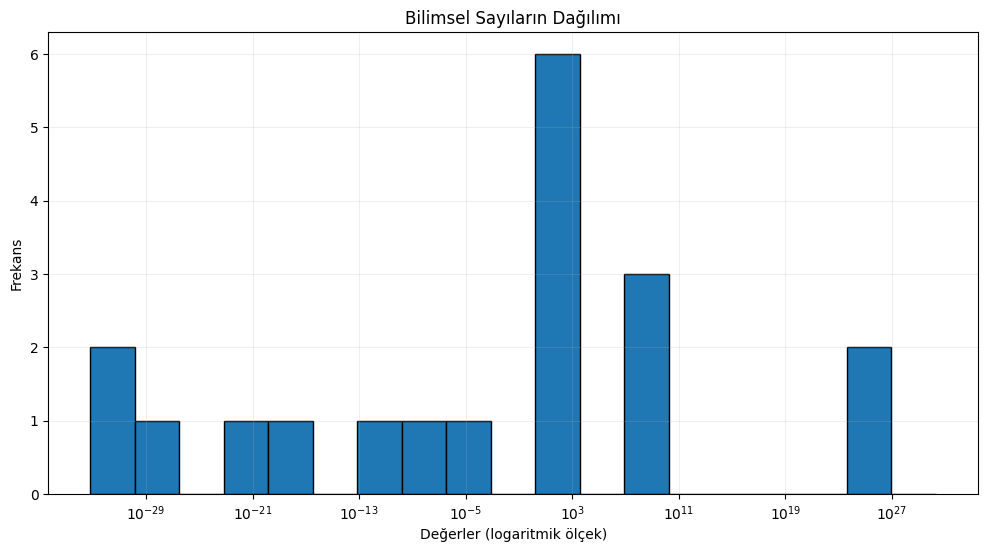

In [3]:
# Logaritmik ölçekte histogram oluşturmayı deneyelim
plt.figure(figsize=(12, 6))

# Bin sayısını belirlemeyi düşünürsek ne olur mesela
num_bins = 20  # İhtiyaca göre bu sayıyı değiştirebiliriz

# Veri aralığının logaritmasını hesaplayan bir formül düşünelim
log_min = np.log10(data.min())
log_max = np.log10(data.max())

# Logaritmik olarak eşit aralıklı binler oluşturmayı düşünelim
bins = np.logspace(log_min, log_max, num_bins)

# Histogram grafiği
plt.hist(data, bins=bins, edgecolor='black')
plt.title('Bilimsel Sayıların Dağılımı')
plt.xlabel('Değerler (logaritmik ölçek)')
plt.ylabel('Frekans')
plt.xscale('log')  # x eksenini logaritmik ölçeğe ayarlayalim
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.show()


In [4]:
# Dağılım analizi için verileri logaritmik olarak dönüştürelim
log_data = np.log(data)

# Dağılım analizini burada görelim bir
distributions = [
    ('Normal', stats.norm),
    ('Log-normal', stats.lognorm),
    ('Exponential', stats.expon),
    ('Gamma', stats.gamma)
]

results = []

for name, distribution in distributions:
    # Dağılım parametrelerini tahmin et
    if name == 'Log-normal':
        # Log-normal dağılımı için özel işlem fonksiyonunu yazalim vectorel
        shape, loc, scale = distribution.fit(data, floc=0)
        params = (shape, loc, scale)
        # Kolmogorov testi için CDF fonksiyonunu tanımla
        cdf = lambda x: distribution.cdf(x, *params)
    else:
        # Diğer dağılımlar için
        params = distribution.fit(log_data)
        # Kolmo testi için CDF fonksiyonunu tanımlayalim
        cdf = lambda x: distribution.cdf(np.log(x), *params)
    
    # Kolmogorov-Smirnov testi diye bir yöntemden bahsetmistik
    D, p_value = stats.kstest(data, cdf)
    
    # Benzerlik oranını hesaplayalim bu yöntemi göz önünde bulundurup (1 - D istatistiği)
    similarity = 1 - D
    
    results.append((name, similarity, p_value))

# Sonuçları benzerlik oranına göre sıralayalım
results.sort(key=lambda x: x[1], reverse=True)

print("\nDağılım Analizi Sonuçları:")
for name, similarity, p_value in results:
    print(f"{name} Dağılımı:")
    print(f"  Benzerlik Oranı: {similarity:.2%}")
    print(f"  p-değeri: {p_value:.4e}")
    if p_value > 0.05:
        print("  Veriler bu dağılıma uyuyor olabilir.")
    else:
        print("  Veriler bu dağılıma uymama eğiliminde.")
    print()



Dağılım Analizi Sonuçları:
Normal Dağılımı:
  Benzerlik Oranı: 84.11%
  p-değeri: 6.3711e-01
  Veriler bu dağılıma uyuyor olabilir.

Log-normal Dağılımı:
  Benzerlik Oranı: 84.11%
  p-değeri: 6.3711e-01
  Veriler bu dağılıma uyuyor olabilir.

Gamma Dağılımı:
  Benzerlik Oranı: 83.78%
  p-değeri: 6.1171e-01
  Veriler bu dağılıma uyuyor olabilir.

Exponential Dağılımı:
  Benzerlik Oranı: 72.66%
  p-değeri: 8.2111e-02
  Veriler bu dağılıma uyuyor olabilir.



## Results and Analysis
After running the analysis, we compared the data to multiple statistical distributions (Normal, Log-normal, Exponential, and Gamma) using the Kolmogorov-Smirnov test. This test evaluates how closely the data matches each distribution, giving us a sense of which model best fits our scientific constants.

### Observations:
- **Normal Distribution**: When we applied a logarithmic transformation to the data, it closely resembled a normal distribution. This suggests that after accounting for the wide range in magnitudes (due to the scientific nature of the data), the values are normally distributed.
  
- **Log-normal Distribution**: Without any transformations, the original dataset shows some resemblance to a log-normal distribution. Given that many natural and scientific phenomena (like income distribution or biological growth rates) follow log-normal distributions, this makes sense.

- **Exponential and Gamma Distributions**: These distributions were less fitting for the dataset. While exponential and gamma models often describe time between events or life spans of particles, they don't seem to capture the behavior of these scientific constants well.


### Conclusion:
While the dataset doesn't perfectly match any single distribution, the closest fits were observed with the normal and log-normal models. These findings align with the notion that many large-scale scientific values, once logarithmically transformed, tend to fall into familiar statistical patterns.
